**References**: https://github.com/blockchain-etl/ethereum-etl

# Problem Set 1 Checklist

**Please customize the following inputs to generate your own results for discussion**

 
* Infura/Alchemy/QuickNode API endpoints: experiment with multiple node operators and see if you could get the same data

* Data radius, start, and end blocks: pick a smaller radius for testing before you scale

* Token address: Pick your choice of token in querying the token transfer part

**Please post the sharing (Allow viewing or commenting only) URL for your Google Colab after you are done below.**

Important: Change your private API token key to "API_KEY" before posting 



## Question 1 
Did you get the same data querying via different node operators? Please point to at least one specific observation to validate your answer. 

Please insert Figures/Tables to better represent your idea. 


Alchemy

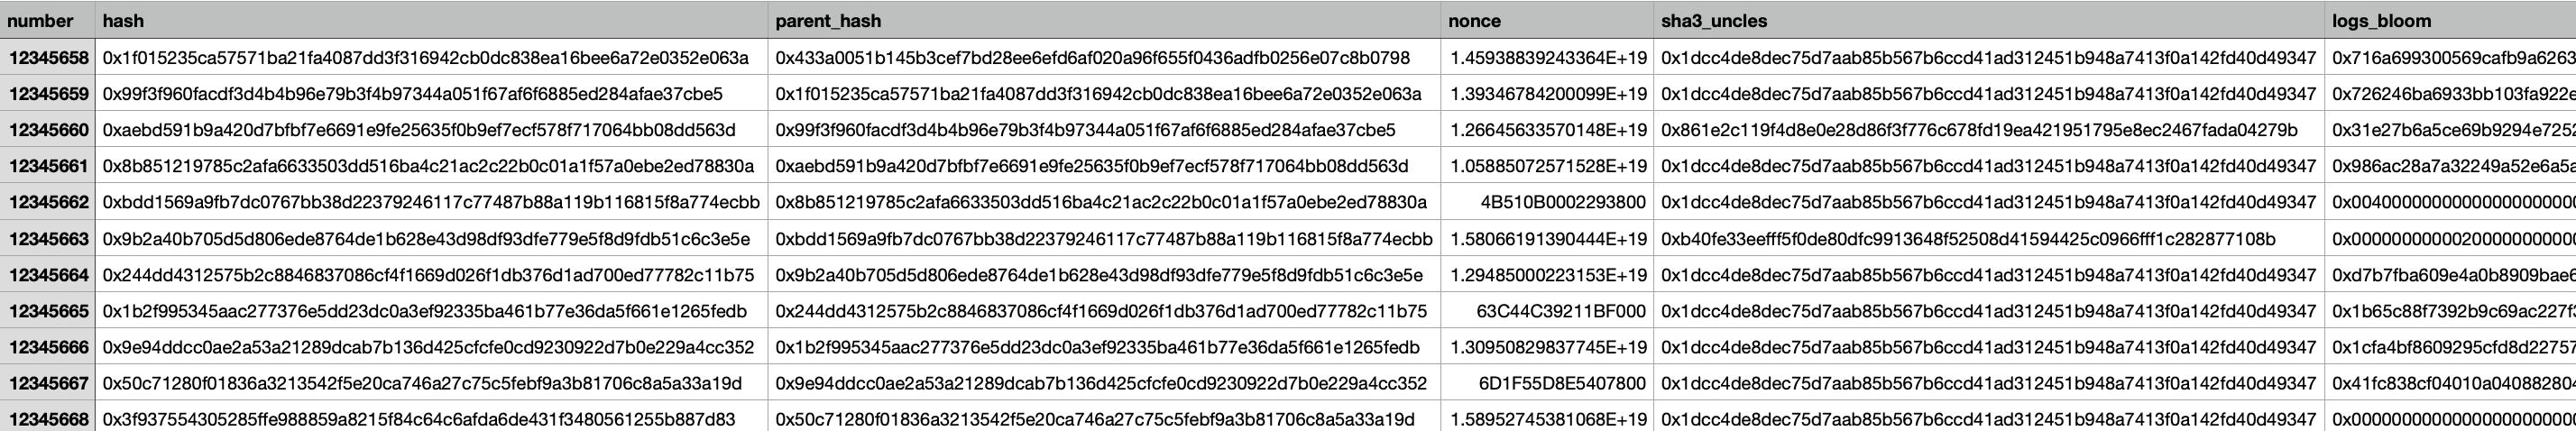

Infura

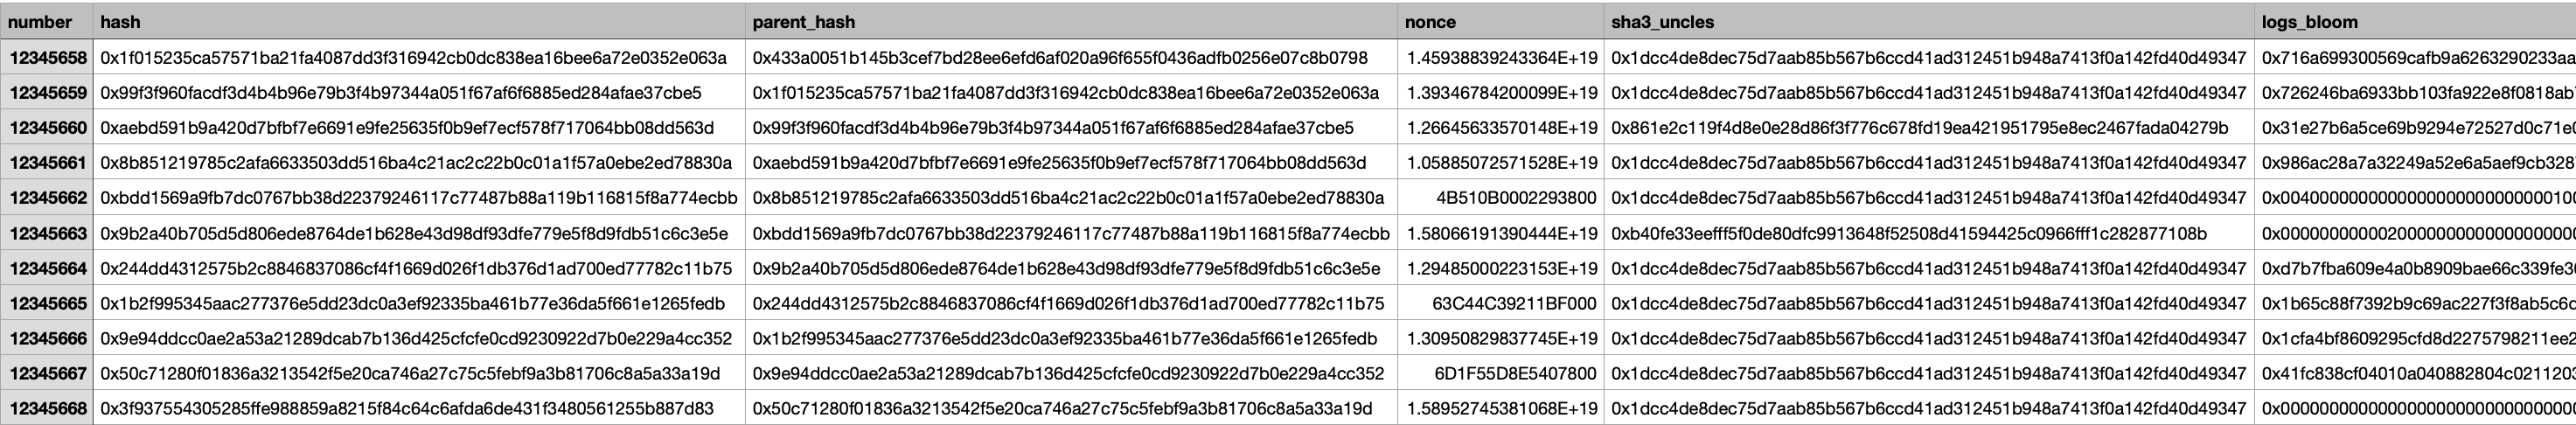

QuickNode

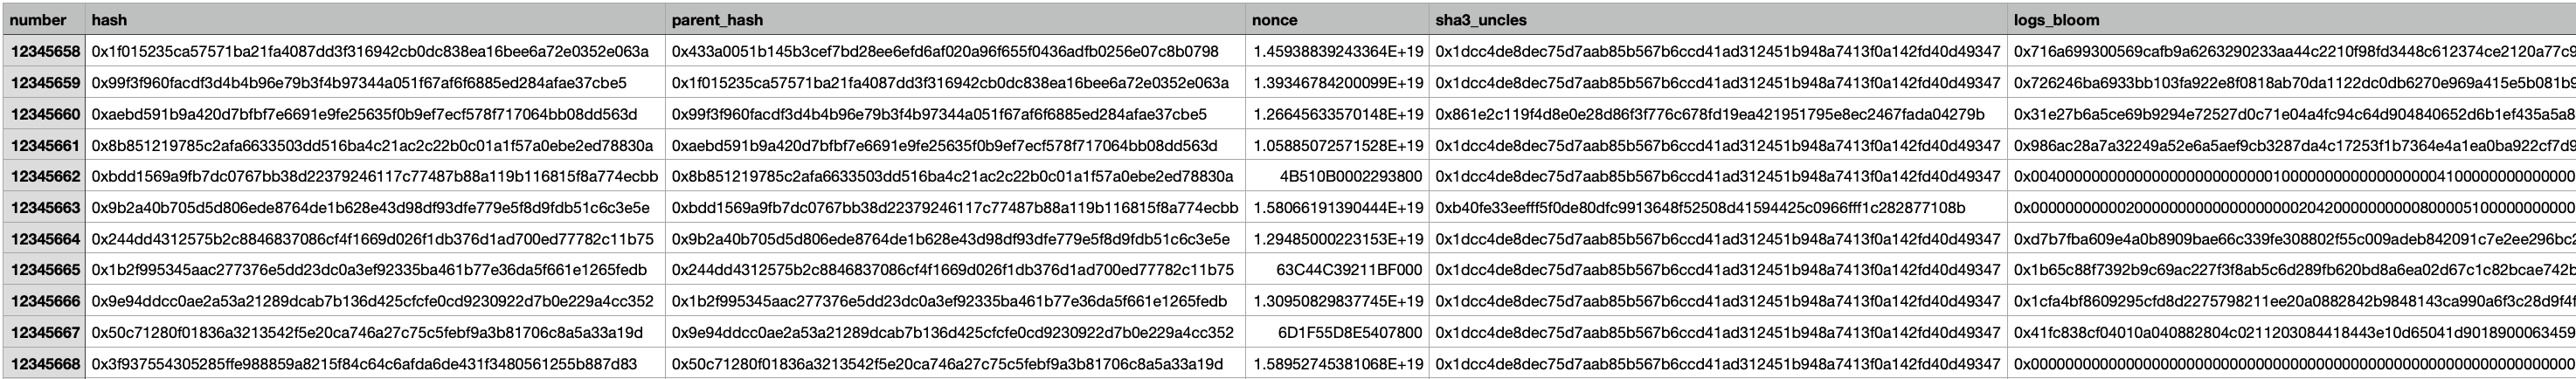

As shown in the three figures above, the block data queried by Infura, Alchemy and QuickNode share the same number, hash, parent hash and nounce.


## Question 2
Please introduce the ERC20 token that you queried in 100 words:

1.When the token first was issued?

2.What functions do the token support?

3.What is the current market value of the token?

4.Find an academic paper or industry report about the token and summary in the 6 facets of background/motivation, research question, application scenario, methodology, results, intellectual merits/practical impacts.


Please provide references that could back-up your answer. Please insert Figures/Tables to better represent your idea.

The Token was first issued on August 24th 2018. Its function is a decentralized peer-to-peer network that aims to offer improved video delivery at lower costs.Its current price is $5.27.

Background: Initially launched as an ERC-20 token, Theta has run its mainnet since March 2019, following a $20MM raise via private token sales in 2017.

Research Question: Introduction of Theta Network and what are its unique features and token running model?

Application scenario: An End-to-End Infrastructure For Decentralized Video Streaming.

Methodology: Historical data analysis and prediction of future for proving its several features

Results: Theta Network is a peer-to-peer video delivery system and a high-speed infrastructure making three technical design choices that has drastically shaped the entire project.

Intellectual merits/practical impacts: It aims to allow a user to create an off-chain micropayment pool that any other user can withdraw from using off-chain transactions,while it keeps a signature through the partial aggregation of signatures from its neighbors before gossiping it out the aggregated signature. 





https://research.binance.com/en/projects/theta-network

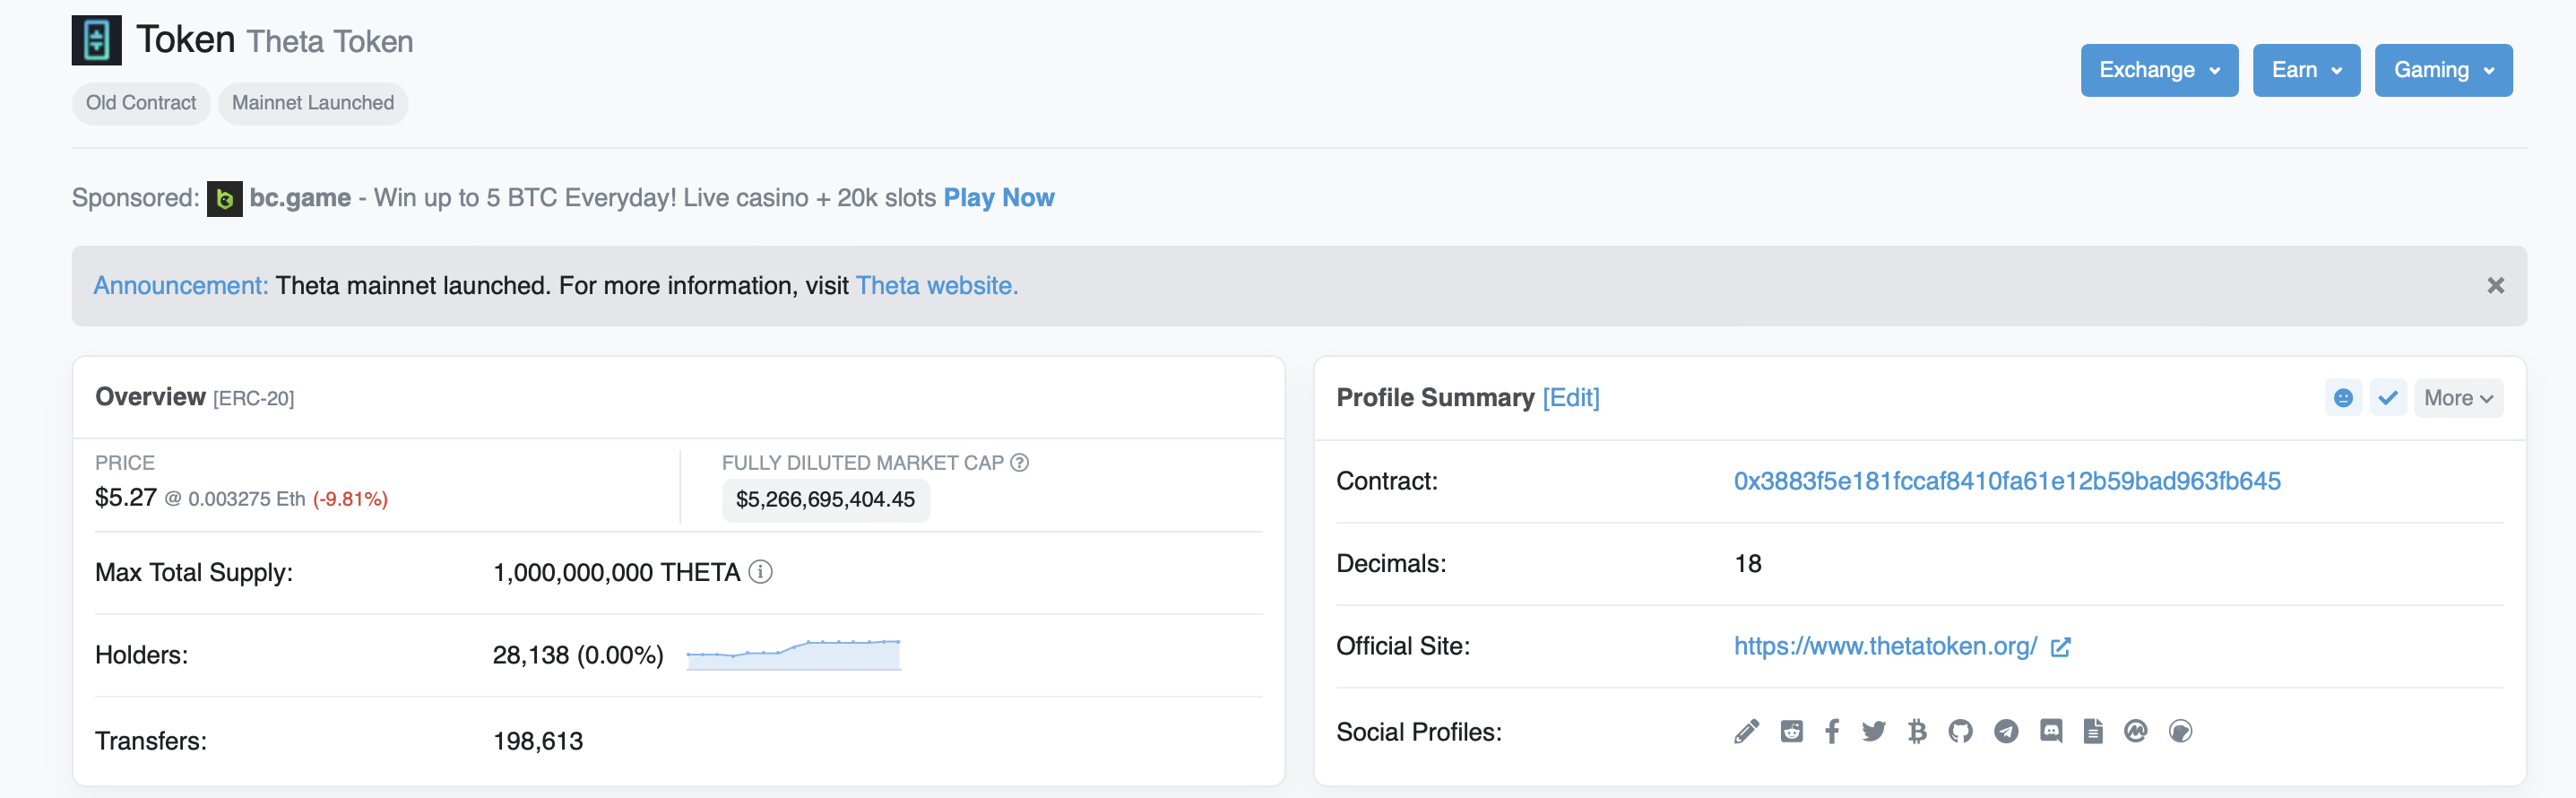

### Question 3: 

Please introduce the ERC20 token that you queried in 100 words:

1.When the token first was issued?

2.What functions do the token support?

3.What is the current market value of the token?

4.Find an academic paper or industry report about the token and summary in the 6 facets of background/motivation, research question, application scenario, methodology, results, intellectual merits/practical impacts.


Please provide references that could back-up your answer. Please insert Figures/Tables to better represent your idea.

The token was first issued 19hours and 30 minutes ago (now is 9:39pm CST).  Its function is a one-of-a-kind digital masterpiece featuring intricate designs and vibrant colors.. Its current value is $1.62.



Background: While the crypto community has been enthralled with DeFi, non-fungible tokens (NFTs) have been growing in popularity, slowly but surely. NFTs allow for digital scarcity and provable ownership of unique, one-of-a-kind assets. 

Research Question: In this research piece, the authors introduce some non-fungible tokens and their differences.

Application scenario: The different platforms where you can use and trade them.

Methodology: Comparing different types of non-fungible and their historical data.

Results: Although we have seen promising signs of life within the NFT space, there is still a long way to go before this novel application of blockchain technology reaches mass adoption. 

Intellectual merits/practical impacts: Non-fungible tokens combine the best traits of decentralized blockchain technology with non-fungible assets to create provably unique, provably scarce, and provably authentic tokens utilizing blockchain technology.

https://theblockchaintest.com/uploads/resources/Kendrick%20Lau%20-%20Non-Fungible%20Tokens,%20A%20Brief%20Introduction%20and%20History%20-%202020%20Nov.pdf

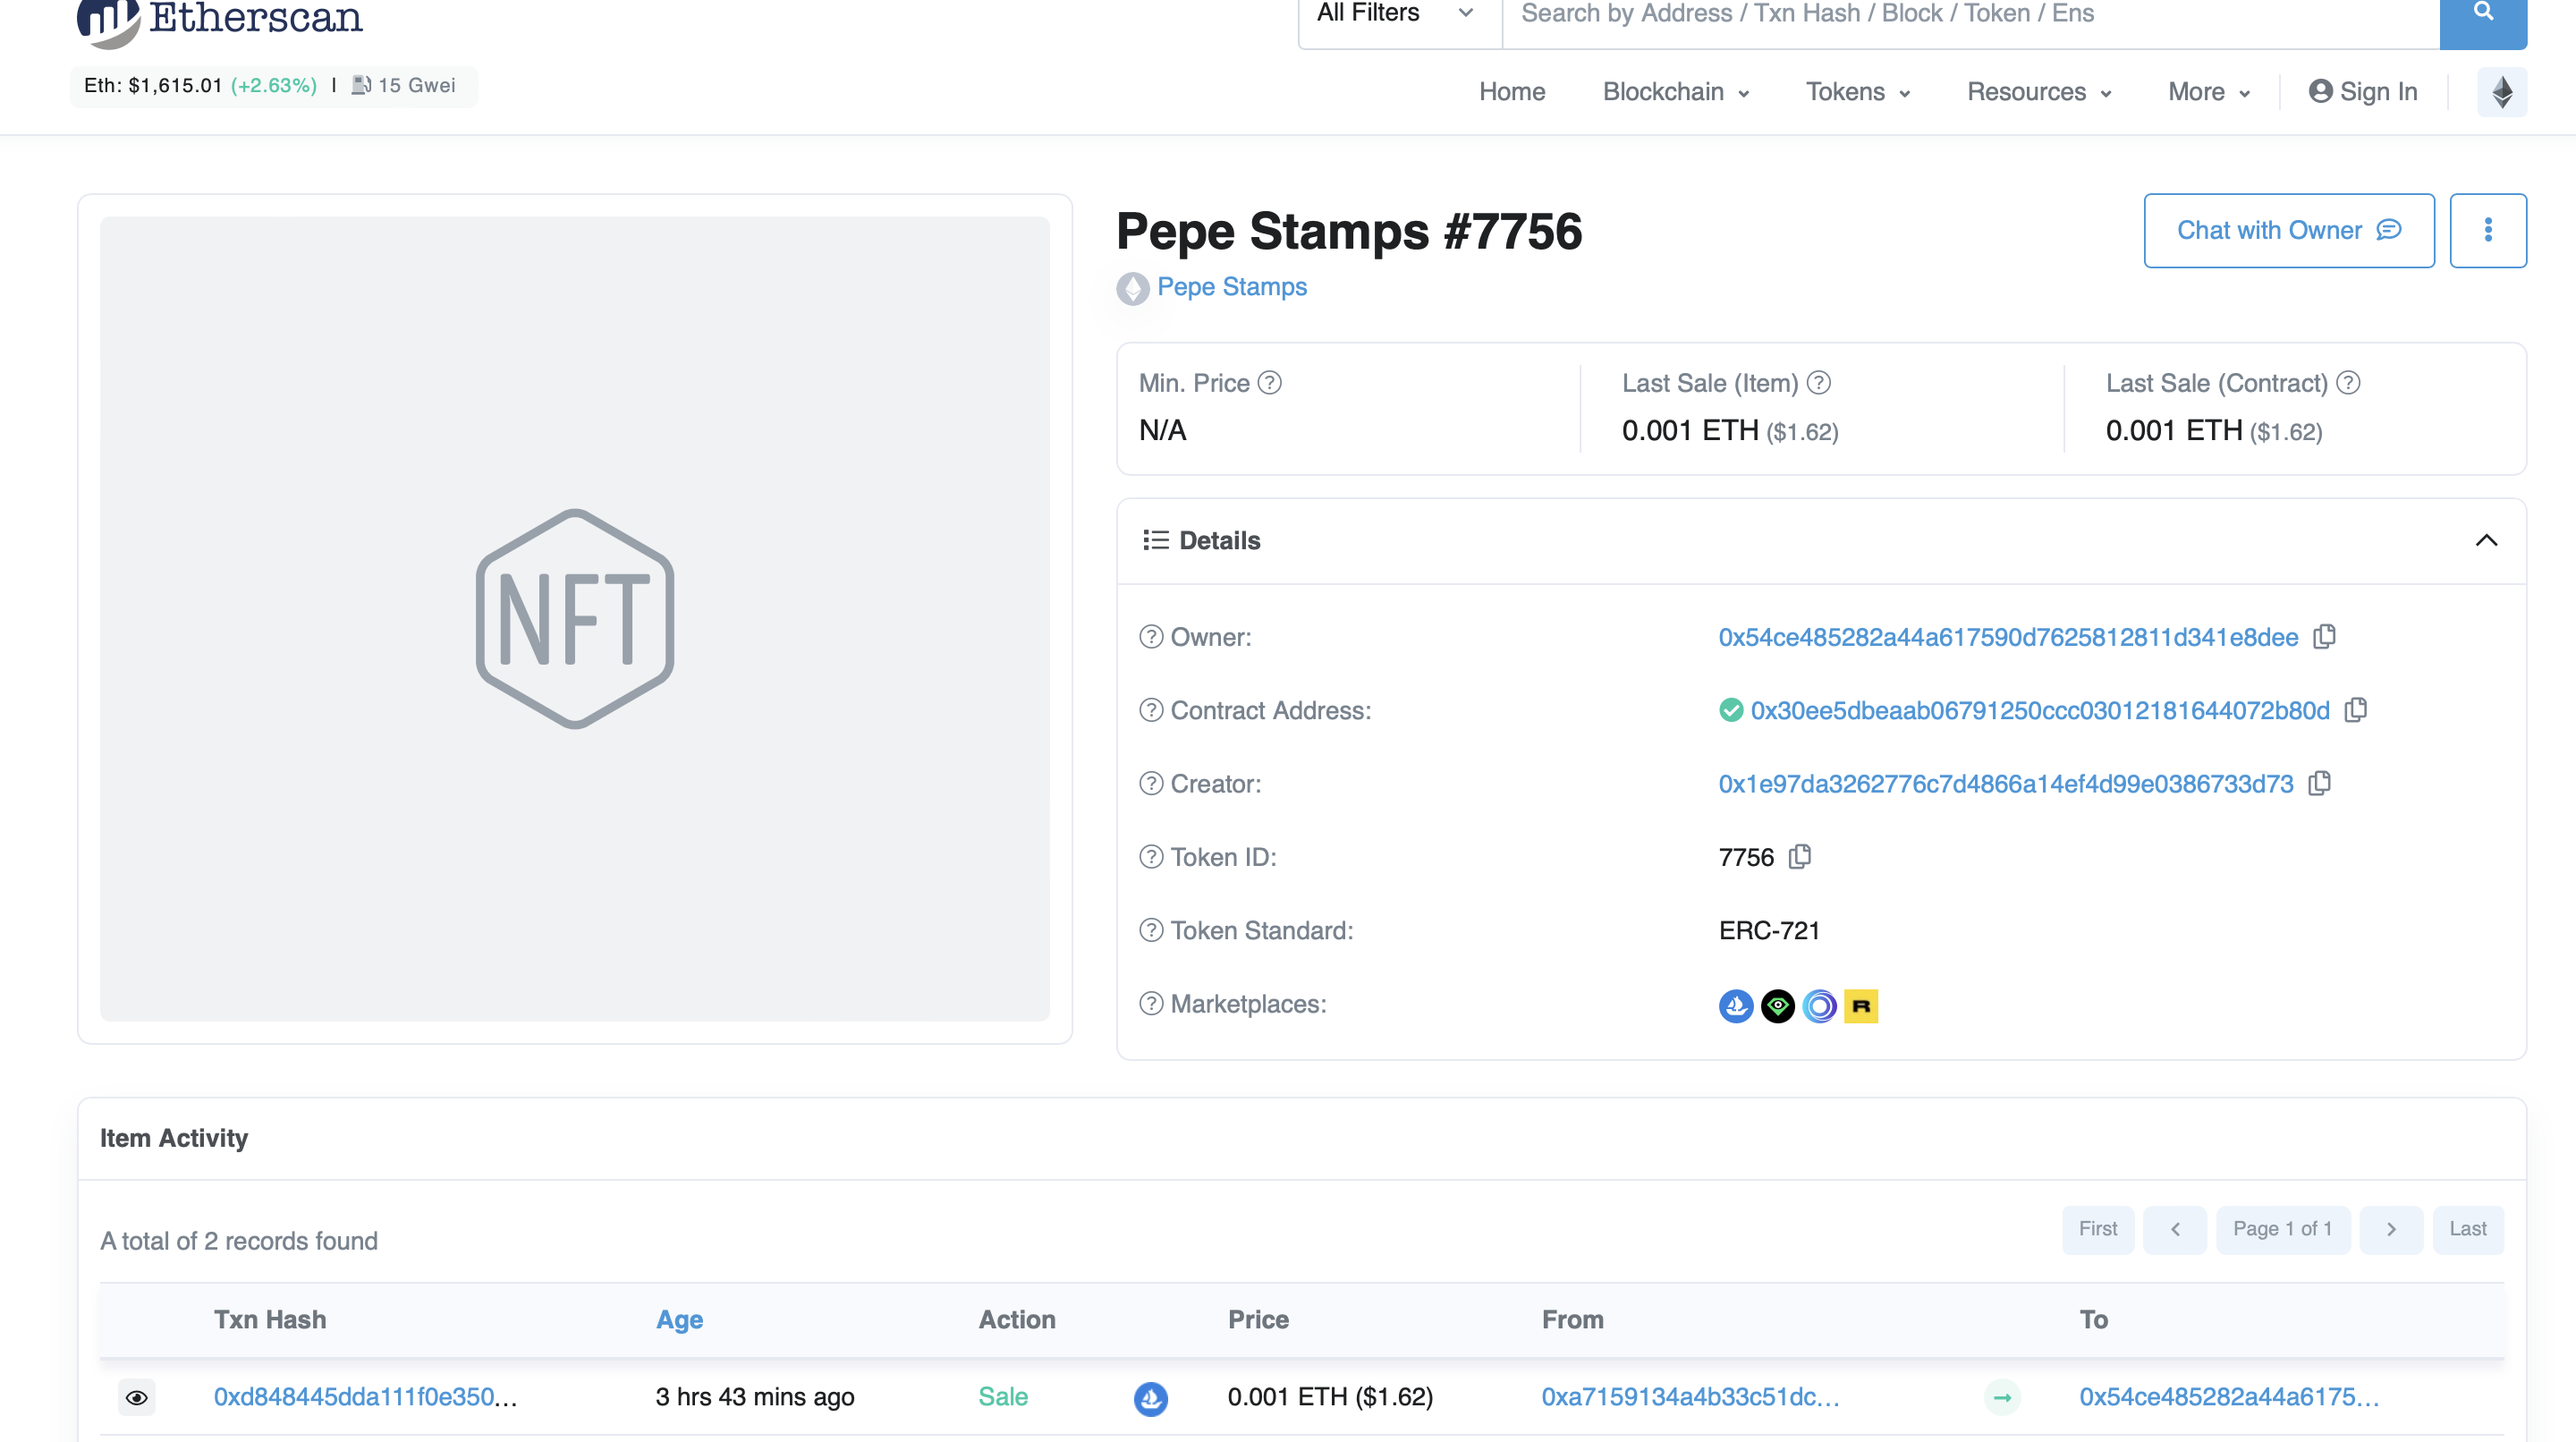

# Part I: Install Required Dependancies 

In [ ]:
# install ethereum-etl and pandas
!python -m pip install ethereum-etl pandas

# Part II: Mount Google Drive for Result Exports

In [8]:
# mount google drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# print the current directory
!pwd

/content


In [10]:
#@title path
#create a project folder and identify the path
path = "/content/drive/MyDrive/EthereumETL" #@param {type:"string"}


In [11]:
#go to your project folder 
%cd /content/drive/MyDrive/EthereumETL

/content/drive/MyDrive/EthereumETL


In [12]:
# print the current directory again to make sure that you are in the project folder
!pwd

/content/drive/MyDrive/EthereumETL


# Part III: Query Data and Export CSV

## 0.Register Accounts on Remote Nodes Service and Get the URLs of the Nodes

### Remote node option 1: Infura

!!! Important Notes: Please replace https://mainnet.infura.io/v3/API_KEY with your own endpoints for all the codes below

In [13]:
#@title Import using the Infura node
infura_end_points_URL = "https://mainnet.infura.io/v3/API_KEY" #@param {type:"string"}


### Remote node option 2: Alchemy 

In [14]:
#@title import using Alchemy
alchemy_end_points_URL = "https://eth-mainnet.g.alchemy.com/v2/API_KEY" #@param {type:"string"}


### Remote node option 3: QuickNode

In [15]:
#@title import using QuickNode
QuickNode_end_points_URL = "https://indulgent-cold-energy.discover.quiknode.pro/API_KEY" #@param {type:"string"}




Data Range: We are going to query the block and transaction data for the ethereum blockchain before and after the merge (block number: 15537393 on September 15)

Reference; 
https://www.investopedia.com/ethereum-completes-the-merge-6666337



In [16]:
#@title the merge
merge = 12345678 #@param {type:"number"}

In [17]:
#@title data radius
radius = 20 #@param {type:"number"}


In [18]:
### find the start and the end
start = merge-radius
end = merge+radius
print(start, end)

12345658 12345698


## 1. Query Block Data

### using the infura endpoint

In [19]:
!ethereumetl export_blocks_and_transactions --start-block 12345658 --end-block 12345698 --blocks-output blocks.csv --provider-uri https://mainnet.infura.io/v3/5456aa0295794fd0a79bbe0a4e927922

2023-01-29 11:46:48,063 - ProgressLogger [INFO] - Started work. Items to process: 41.
2023-01-29 11:46:48,516 - ProgressLogger [INFO] - 41 items processed. Progress is 100%.
2023-01-29 11:46:48,517 - ProgressLogger [INFO] - Finished work. Total items processed: 41. Took 0:00:00.453172.
2023-01-29 11:46:48,518 - CompositeItemExporter [INFO] - block items exported: 41
2023-01-29 11:46:48,518 - CompositeItemExporter [INFO] - transaction items exported: 0


In [20]:
# import libraries to print data frame
import pandas as pd

In [21]:
# set to print the maximum numbers of rows
pd.set_option('display.max_rows', None)

In [22]:
df_blocks = pd.read_csv('./blocks.csv')
display(df_blocks.head(10))

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
0,12345658,0x1f015235ca57571ba21fa4087dd3f316942cb0dc838e...,0x433a0051b145b3cef7bd28ee6efd6af020a96f655f04...,0xca87e41b835a23b6,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x716a699300569cafb9a6263290233aa44c2210f98fd3...,0x5caf5e833f97cb8af6d17782400eaedbc629298b4a03...,0x0252a0f285810b39a1bcaf840628a84d5bf8c20c83ed...,0x651be62d59d14a628fe51c3f26d979b5c2d0f56ff493...,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,7173121372173029,24021347197716873783143,74792,0x6574682d70726f2d687a6f2d74303035,14932206,14825375,1619836953,160,NaN
1,12345659,0x99f3f960facdf3d4b4b96e79b3f4b97344a051f67af6...,0x1f015235ca57571ba21fa4087dd3f316942cb0dc838e...,0xc161ec31a3fe30db,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x726246ba6933bb103fa922e8f0818ab70da1122dc0db...,0x126fd1a8a072bcc67bd2cff7a04cf7fbdd0129de66d5...,0x738b539327e2bbb099fdb2f81cac74f10ecb1ecd5f42...,0xdacf9eee1663d5cd57b98e52e33e0a8a2a49dafaf2d6...,0x1ad91ee08f21be3de0ba2ba6918e714da6b45836,7173123519656677,24021354370840393439820,44833,0x486976656f6e2063612d68656176792077725746,14917625,14904037,1619836964,150,NaN
2,12345660,0xaebd591b9a420d7bfbf7e6691e9fe25635f0b9ef7ecf...,0x99f3f960facdf3d4b4b96e79b3f4b97344a051f67af6...,0xafc19146024b7a30,0x861e2c119f4d8e0e28d86f3f776c678fd19ea4219517...,0x31e27b6a5ce69b9294e72527d0c71e04a4fc94c64d90...,0xb2269b664e12a0913b73e9ed9e897628dc4728ebff7b...,0x7c271402f1698e1d380f74211d2930b901f8f6385ff1...,0x4a87b9ae1fae41ca846bfcf6650c1ed493713e0c672c...,0x1ad91ee08f21be3de0ba2ba6918e714da6b45836,7176628168858907,24021361547468562298727,105081,0x486976656f6e2072752d6865617679205350674e,14903059,14889077,1619836970,185,NaN
3,12345661,0x8b851219785c2afa6633503dd516ba4c21ac2c22b0c0...,0xaebd591b9a420d7bfbf7e6691e9fe25635f0b9ef7ecf...,0x92f1ef40043da9c0,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x986ac28a7a32249a52e6a5aef9cb3287da4c17253f1b...,0xcd32215af37b94c89f3161b490a86f16111c16d0195b...,0x48b3c826288e08bf8a710a55b3a0232bc0a9695362e0...,0x531b69fe6ccc49d9fbd31634726c5b4e4996d2a86890...,0x04668ec2f57cc15c381b461b9fedab5d451c8f7f,7180134529315630,24021368727603091614357,46564,0x73706964657231330e0b8c21,14910317,14895327,1619836982,169,NaN
4,12345662,0xbdd1569a9fb7dc0767bb38d22379246117c77487b88a...,0x8b851219785c2afa6633503dd516ba4c21ac2c22b0c0...,0x4b510b0002292ca5,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00400000000000000000000000001000000000000000...,0xd31b9e1ccdd945394943721cf58a501effddc70ee474...,0x489d902df89ebfeb3617e24630a5260d0fbbab4e5ebe...,0x4e3c6eed67fafc31765dbdecf76200044efc274a6337...,0x829bd824b016326a401d083b33d092293333a830,7180136676799278,24021375907739768413635,80910,0xe4b883e5bda9e7a59ee4bb99e9b1bc020621,14895758,14892562,1619836997,704,NaN
5,12345663,0x9b2a40b705d5d806ede8764de1b628e43d98df93dfe7...,0xbdd1569a9fb7dc0767bb38d22379246117c77487b88a...,0xdb5c645c22a14524,0xb40fe33eefff5f0de80dfc9913648f52508d41594425...,0x00000000000200000000000000000002042000000000...,0x25718e81c9d608e72e713c6b69c800e15aed9137eea0...,0x088d40a4623456a6512eab0a30577c57cb4809f9fcbf...,0x81ccd167fb7e212185a339316127ce372bacb004751f...,0x829bd824b016326a401d083b33d092293333a830,7176632898171208,24021383084372666584843,81378,0xe4b883e5bda9e7a59ee4bb99e9b1bc090821,14881213,14878221,1619837021,703,NaN
6,12345664,0x244dd4312575b2c8846837086cf4f1669d026f1db376...,0x9b2a40b705d5d806ede8764de1b628e43d98df93dfe7...,0xb3b2502a8c3de6f2,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xd7b7fba609e4a0b8909bae66c339fe308802f55c009a...,0xa8615e34921ad24e27a437eafe0336c3d390d35ed8e0...,0x78cc9771fd6eb41a7bb869e5bc186fd42323cf352caa...,0xb4d7b1832dd9501bb975e74c16e7b22088c620f6afcd...,0xd224ca0c819e8e97ba0136b3b95ceff503b79f53,7180139260937166,24021390264511927522009,57316,0x7575706f6f6c2e636e2d32,14895744,14876919,1619837

### query blockchain data using the alchemy endpoint


In [23]:
!ethereumetl export_blocks_and_transactions --start-block 12345658 --end-block 12345698 --blocks-output blocks_alchemy.csv --provider-uri https://eth-mainnet.g.alchemy.com/v2/p665VuKcxyRiP7b880daxb7UoL2-dz0r


2023-01-29 11:47:00,960 - ProgressLogger [INFO] - Started work. Items to process: 41.
2023-01-29 11:47:01,165 - ProgressLogger [INFO] - 41 items processed. Progress is 100%.
2023-01-29 11:47:01,165 - ProgressLogger [INFO] - Finished work. Total items processed: 41. Took 0:00:00.204872.
2023-01-29 11:47:01,166 - CompositeItemExporter [INFO] - block items exported: 41
2023-01-29 11:47:01,167 - CompositeItemExporter [INFO] - transaction items exported: 0


In [24]:
df_blocks_alchemy = pd.read_csv('./blocks_alchemy.csv')
display(df_blocks_alchemy.head(10))

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
0,12345658,0x1f015235ca57571ba21fa4087dd3f316942cb0dc838e...,0x433a0051b145b3cef7bd28ee6efd6af020a96f655f04...,0xca87e41b835a23b6,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x716a699300569cafb9a6263290233aa44c2210f98fd3...,0x5caf5e833f97cb8af6d17782400eaedbc629298b4a03...,0x0252a0f285810b39a1bcaf840628a84d5bf8c20c83ed...,0x651be62d59d14a628fe51c3f26d979b5c2d0f56ff493...,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,7173121372173029,24021347197716873783143,74792,0x6574682d70726f2d687a6f2d74303035,14932206,14825375,1619836953,160,NaN
1,12345659,0x99f3f960facdf3d4b4b96e79b3f4b97344a051f67af6...,0x1f015235ca57571ba21fa4087dd3f316942cb0dc838e...,0xc161ec31a3fe30db,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x726246ba6933bb103fa922e8f0818ab70da1122dc0db...,0x126fd1a8a072bcc67bd2cff7a04cf7fbdd0129de66d5...,0x738b539327e2bbb099fdb2f81cac74f10ecb1ecd5f42...,0xdacf9eee1663d5cd57b98e52e33e0a8a2a49dafaf2d6...,0x1ad91ee08f21be3de0ba2ba6918e714da6b45836,7173123519656677,24021354370840393439820,44833,0x486976656f6e2063612d68656176792077725746,14917625,14904037,1619836964,150,NaN
2,12345660,0xaebd591b9a420d7bfbf7e6691e9fe25635f0b9ef7ecf...,0x99f3f960facdf3d4b4b96e79b3f4b97344a051f67af6...,0xafc19146024b7a30,0x861e2c119f4d8e0e28d86f3f776c678fd19ea4219517...,0x31e27b6a5ce69b9294e72527d0c71e04a4fc94c64d90...,0xb2269b664e12a0913b73e9ed9e897628dc4728ebff7b...,0x7c271402f1698e1d380f74211d2930b901f8f6385ff1...,0x4a87b9ae1fae41ca846bfcf6650c1ed493713e0c672c...,0x1ad91ee08f21be3de0ba2ba6918e714da6b45836,7176628168858907,24021361547468562298727,105081,0x486976656f6e2072752d6865617679205350674e,14903059,14889077,1619836970,185,NaN
3,12345661,0x8b851219785c2afa6633503dd516ba4c21ac2c22b0c0...,0xaebd591b9a420d7bfbf7e6691e9fe25635f0b9ef7ecf...,0x92f1ef40043da9c0,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x986ac28a7a32249a52e6a5aef9cb3287da4c17253f1b...,0xcd32215af37b94c89f3161b490a86f16111c16d0195b...,0x48b3c826288e08bf8a710a55b3a0232bc0a9695362e0...,0x531b69fe6ccc49d9fbd31634726c5b4e4996d2a86890...,0x04668ec2f57cc15c381b461b9fedab5d451c8f7f,7180134529315630,24021368727603091614357,46564,0x73706964657231330e0b8c21,14910317,14895327,1619836982,169,NaN
4,12345662,0xbdd1569a9fb7dc0767bb38d22379246117c77487b88a...,0x8b851219785c2afa6633503dd516ba4c21ac2c22b0c0...,0x4b510b0002292ca5,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00400000000000000000000000001000000000000000...,0xd31b9e1ccdd945394943721cf58a501effddc70ee474...,0x489d902df89ebfeb3617e24630a5260d0fbbab4e5ebe...,0x4e3c6eed67fafc31765dbdecf76200044efc274a6337...,0x829bd824b016326a401d083b33d092293333a830,7180136676799278,24021375907739768413635,80910,0xe4b883e5bda9e7a59ee4bb99e9b1bc020621,14895758,14892562,1619836997,704,NaN
5,12345663,0x9b2a40b705d5d806ede8764de1b628e43d98df93dfe7...,0xbdd1569a9fb7dc0767bb38d22379246117c77487b88a...,0xdb5c645c22a14524,0xb40fe33eefff5f0de80dfc9913648f52508d41594425...,0x00000000000200000000000000000002042000000000...,0x25718e81c9d608e72e713c6b69c800e15aed9137eea0...,0x088d40a4623456a6512eab0a30577c57cb4809f9fcbf...,0x81ccd167fb7e212185a339316127ce372bacb004751f...,0x829bd824b016326a401d083b33d092293333a830,7176632898171208,24021383084372666584843,81378,0xe4b883e5bda9e7a59ee4bb99e9b1bc090821,14881213,14878221,1619837021,703,NaN
6,12345664,0x244dd4312575b2c8846837086cf4f1669d026f1db376...,0x9b2a40b705d5d806ede8764de1b628e43d98df93dfe7...,0xb3b2502a8c3de6f2,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xd7b7fba609e4a0b8909bae66c339fe308802f55c009a...,0xa8615e34921ad24e27a437eafe0336c3d390d35ed8e0...,0x78cc9771fd6eb41a7bb869e5bc186fd42323cf352caa...,0xb4d7b1832dd9501bb975e74c16e7b22088c620f6afcd...,0xd224ca0c819e8e97ba0136b3b95ceff503b79f53,7180139260937166,24021390264511927522009,57316,0x7575706f6f6c2e636e2d32,14895744,14876919,1619837

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### query the data using the QuickNode endpoint

In [ ]:
!ethereumetl export_blocks_and_transactions --start-block 12345658 --end-block 12345698 --blocks-output blocks_QuickNode.csv --provider-uri https://convincing-winter-tab.discover.quiknode.pro/c9406649d2d81896eec1499ebc3c622704b130de/

In [27]:
df_blocks_QuickNode = pd.read_csv('./blocks_QuickNode.csv')
display(df_blocks_QuickNode.head(10))

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
0,12345658,0x1f015235ca57571ba21fa4087dd3f316942cb0dc838e...,0x433a0051b145b3cef7bd28ee6efd6af020a96f655f04...,0xca87e41b835a23b6,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x716a699300569cafb9a6263290233aa44c2210f98fd3...,0x5caf5e833f97cb8af6d17782400eaedbc629298b4a03...,0x0252a0f285810b39a1bcaf840628a84d5bf8c20c83ed...,0x651be62d59d14a628fe51c3f26d979b5c2d0f56ff493...,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,7173121372173029,24021347197716873783143,74792,0x6574682d70726f2d687a6f2d74303035,14932206,14825375,1619836953,160,NaN
1,12345659,0x99f3f960facdf3d4b4b96e79b3f4b97344a051f67af6...,0x1f015235ca57571ba21fa4087dd3f316942cb0dc838e...,0xc161ec31a3fe30db,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x726246ba6933bb103fa922e8f0818ab70da1122dc0db...,0x126fd1a8a072bcc67bd2cff7a04cf7fbdd0129de66d5...,0x738b539327e2bbb099fdb2f81cac74f10ecb1ecd5f42...,0xdacf9eee1663d5cd57b98e52e33e0a8a2a49dafaf2d6...,0x1ad91ee08f21be3de0ba2ba6918e714da6b45836,7173123519656677,24021354370840393439820,44833,0x486976656f6e2063612d68656176792077725746,14917625,14904037,1619836964,150,NaN
2,12345660,0xaebd591b9a420d7bfbf7e6691e9fe25635f0b9ef7ecf...,0x99f3f960facdf3d4b4b96e79b3f4b97344a051f67af6...,0xafc19146024b7a30,0x861e2c119f4d8e0e28d86f3f776c678fd19ea4219517...,0x31e27b6a5ce69b9294e72527d0c71e04a4fc94c64d90...,0xb2269b664e12a0913b73e9ed9e897628dc4728ebff7b...,0x7c271402f1698e1d380f74211d2930b901f8f6385ff1...,0x4a87b9ae1fae41ca846bfcf6650c1ed493713e0c672c...,0x1ad91ee08f21be3de0ba2ba6918e714da6b45836,7176628168858907,24021361547468562298727,105081,0x486976656f6e2072752d6865617679205350674e,14903059,14889077,1619836970,185,NaN
3,12345661,0x8b851219785c2afa6633503dd516ba4c21ac2c22b0c0...,0xaebd591b9a420d7bfbf7e6691e9fe25635f0b9ef7ecf...,0x92f1ef40043da9c0,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x986ac28a7a32249a52e6a5aef9cb3287da4c17253f1b...,0xcd32215af37b94c89f3161b490a86f16111c16d0195b...,0x48b3c826288e08bf8a710a55b3a0232bc0a9695362e0...,0x531b69fe6ccc49d9fbd31634726c5b4e4996d2a86890...,0x04668ec2f57cc15c381b461b9fedab5d451c8f7f,7180134529315630,24021368727603091614357,46564,0x73706964657231330e0b8c21,14910317,14895327,1619836982,169,NaN
4,12345662,0xbdd1569a9fb7dc0767bb38d22379246117c77487b88a...,0x8b851219785c2afa6633503dd516ba4c21ac2c22b0c0...,0x4b510b0002292ca5,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00400000000000000000000000001000000000000000...,0xd31b9e1ccdd945394943721cf58a501effddc70ee474...,0x489d902df89ebfeb3617e24630a5260d0fbbab4e5ebe...,0x4e3c6eed67fafc31765dbdecf76200044efc274a6337...,0x829bd824b016326a401d083b33d092293333a830,7180136676799278,24021375907739768413635,80910,0xe4b883e5bda9e7a59ee4bb99e9b1bc020621,14895758,14892562,1619836997,704,NaN
5,12345663,0x9b2a40b705d5d806ede8764de1b628e43d98df93dfe7...,0xbdd1569a9fb7dc0767bb38d22379246117c77487b88a...,0xdb5c645c22a14524,0xb40fe33eefff5f0de80dfc9913648f52508d41594425...,0x00000000000200000000000000000002042000000000...,0x25718e81c9d608e72e713c6b69c800e15aed9137eea0...,0x088d40a4623456a6512eab0a30577c57cb4809f9fcbf...,0x81ccd167fb7e212185a339316127ce372bacb004751f...,0x829bd824b016326a401d083b33d092293333a830,7176632898171208,24021383084372666584843,81378,0xe4b883e5bda9e7a59ee4bb99e9b1bc090821,14881213,14878221,1619837021,703,NaN
6,12345664,0x244dd4312575b2c8846837086cf4f1669d026f1db376...,0x9b2a40b705d5d806ede8764de1b628e43d98df93dfe7...,0xb3b2502a8c3de6f2,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xd7b7fba609e4a0b8909bae66c339fe308802f55c009a...,0xa8615e34921ad24e27a437eafe0336c3d390d35ed8e0...,0x78cc9771fd6eb41a7bb869e5bc186fd42323cf352caa...,0xb4d7b1832dd9501bb975e74c16e7b22088c620f6afcd...,0xd224ca0c819e8e97ba0136b3b95ceff503b79f53,7180139260937166,24021390264511927522009,57316,0x7575706f6f6c2e636e2d32,14895744,14876919,1619837

## 2. Query Transaction Data

In [28]:
!ethereumetl export_blocks_and_transactions --start-block 12345658 --end-block 12345698 --transactions-output transactions.csv --provider-uri https://mainnet.infura.io/v3/5456aa0295794fd0a79bbe0a4e927922

2023-01-29 11:47:24,872 - ProgressLogger [INFO] - Started work. Items to process: 41.
2023-01-29 11:47:28,587 - ProgressLogger [INFO] - 41 items processed. Progress is 100%.
2023-01-29 11:47:28,587 - ProgressLogger [INFO] - Finished work. Total items processed: 41. Took 0:00:03.715942.
2023-01-29 11:47:28,588 - CompositeItemExporter [INFO] - block items exported: 0
2023-01-29 11:47:28,589 - CompositeItemExporter [INFO] - transaction items exported: 9589


In [29]:
df_transactions = pd.read_csv('./transactions.csv')
display(df_transactions.head())

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type
0,0x53632e9bc051f65e933fb5f9d93d1f78064858482a53...,335,0x1f015235ca57571ba21fa4087dd3f316942cb0dc838e...,12345658,0,0x0c75b0f01d256bbcac0b5d550724c8c574917384,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0,263936,38000000000,0x4a25d94a000000000000000000000000000000000000...,1619836953,NaN,NaN,0
1,0x71ed88add99f3fea2ee38e7e0312367f68e237f6f41a...,107,0x1f015235ca57571ba21fa4087dd3f316942cb0dc838e...,12345658,1,0x29ded856e6fd0749413c8cdbcc3bd0bb73bf6212,0x90a42c675ac61de6971b030b4d5afd532223d7ae,0,500000,0,0x430b0df0000000000000000000000000000000000000...,1619836953,NaN,NaN,0
2,0xd736c81586f7ce1f7dda84b777a0d29812598a88952e...,687,0x1f015235ca57571ba21fa4087dd3f316942cb0dc838e...,12345658,2,0xb3b7874f13387d44a3398d298b075b7a3505d8d4,0xf926694a885f4e88487959ff2a79e3b5fa07505c,1000000000000000000000,50000,50000000000,0x,1619836953,NaN,NaN,0
3,0xdcc28bbbe474372ae8b3ff1c9171966d7c57ed0013af...,1262880,0x1f015235ca57571ba21fa4087dd3f316942cb0dc838e...,12345658,3,0x2faf487a4414fe77e2327f0bf4ae2a264a776ad2,0xdac17f958d2ee523a2206206994597c13d831ec7,0,76221,536900000000,0x23b872dd0000000000000000000000005698b6d4bad5...,1619836953,NaN,NaN,0
4,0x8983387dbcb13451daa64c1507d13d7f26cf5cb41d0d...,371520,0x1f015235ca57571ba21fa4087dd3f316942cb0dc838e...,12345658,4,0x8f22f2063d253846b53609231ed80fa571bc0c8f,0xdac17f958d2ee523a2206206994597c13d831ec7,0,207128,496000000000,0xa9059cbb0000000000000000000000009b9be769d8a0...,1619836953,NaN,NaN,0


## 3. Query Token Data

### 3.1 Query All Token Transfers

In [30]:
!ethereumetl export_token_transfers --start-block 12345658 --end-block 12345698 --provider-uri https://mainnet.infura.io/v3/5456aa0295794fd0a79bbe0a4e927922 --output token_transfers.csv

2023-01-29 11:47:36,959 - ProgressLogger [INFO] - Started work. Items to process: 41.
2023-01-29 11:47:38,853 - ProgressLogger [INFO] - 41 items processed. Progress is 100%.
2023-01-29 11:47:38,854 - ProgressLogger [INFO] - Finished work. Total items processed: 41. Took 0:00:01.895026.
2023-01-29 11:47:38,855 - CompositeItemExporter [INFO] - token_transfer items exported: 6047


In [31]:
df_token_transfers = pd.read_csv('./token_transfers.csv')
display(df_token_transfers.head())

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number
0,0x5a98fcbea516cf06857215779fd812ca3bef1b32,0x0c75b0f01d256bbcac0b5d550724c8c574917384,0x454f11d58e27858926d7a4ece8bfea2c33e97b13,1609705032537384452792,0x53632e9bc051f65e933fb5f9d93d1f78064858482a53...,0,12345658
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x454f11d58e27858926d7a4ece8bfea2c33e97b13,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1500000000000000000,0x53632e9bc051f65e933fb5f9d93d1f78064858482a53...,1,12345658
2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xc558f600b34a5f69dd2f0d06cb8a88d829b7420a,0x90a42c675ac61de6971b030b4d5afd532223d7ae,2097448892407342414,0x71ed88add99f3fea2ee38e7e0312367f68e237f6f41a...,5,12345658
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x90a42c675ac61de6971b030b4d5afd532223d7ae,0x454f11d58e27858926d7a4ece8bfea2c33e97b13,1974710669881550848,0x71ed88add99f3fea2ee38e7e0312367f68e237f6f41a...,6,12345658
4,0x5a98fcbea516cf06857215779fd812ca3bef1b32,0x454f11d58e27858926d7a4ece8bfea2c33e97b13,0xc558f600b34a5f69dd2f0d06cb8a88d829b7420a,2076647814027908416383,0x71ed88add99f3fea2ee38e7e0312367f68e237f6f41a...,7,12345658


In [32]:
df = df_token_transfers[df_token_transfers.token_address=="0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a"]
df.head()

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number


### 3.1 Query a specific ERC20 token transfers


*references*:

* Commond Documentations: https://ethereum-etl.readthedocs.io/en/latest/commands/
* Token Address: https://github.com/blockchain-etl/ethereum-etl-airflow/blob/master/dags/resources/stages/seed/data/token_amendments.csv
* More detailed: https://github.com/blockchain-etl/ethereum-etl-airflow
* Proof-of-Reserve: https://blog.chain.link/stablecoins-and-proof-of-reserve/





In [73]:
#@title Token Name
Token_Name = "Theta Token" #@param {type:"string"}



In [74]:
#@title Token Symbol
Token_Symbol = "USD" #@param {type:"string"}


In [75]:
#@title Token Address
token_address = "0x3883f5e181fccaF8410FA61e12b59BAd963fb645" #@param {type:"string"}


In [78]:
!ethereumetl export_token_transfers --start-block 12345658 --end-block 12345698 --provider-uri https://mainnet.infura.io/v3/5456aa0295794fd0a79bbe0a4e927922 --output token_transfers_Theta.csv --tokens 0x8E870D67F660D95d5be530380D0eC0bd388289E1

2023-01-29 14:53:08,110 - ProgressLogger [INFO] - Started work. Items to process: 41.
2023-01-29 14:53:08,180 - ProgressLogger [INFO] - 41 items processed. Progress is 100%.
2023-01-29 14:53:08,180 - ProgressLogger [INFO] - Finished work. Total items processed: 41. Took 0:00:00.069597.
2023-01-29 14:53:08,181 - CompositeItemExporter [INFO] - token_transfer items exported: 2


In [79]:
df_token_transfers_USDP = pd.read_csv('./token_transfers_Theta.csv')
display(df_token_transfers_USDP.head())

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number
0,0x8e870d67f660d95d5be530380d0ec0bd388289e1,0x6ee425087a27e0d807ce3896738b41794e3547d8,0x6b71dcaa3fb9a4901491b748074a314dad9e980b,2479610000000000000000,0x650e87004e6ddc8b9ac0fdbb7b14a6ffbbf128cb2d4d...,196,12345658
1,0x8e870d67f660d95d5be530380d0ec0bd388289e1,0xd551234ae421e3bcba99a0da6d736074f22192ff,0x6083d1027e81a2d6b9bcab60ba8055e5479422c6,1485047839880000000000,0x49ccbda10ad6f4089ca361be6ebb3a8847f5bcfefcec...,27,12345681


3.2 Query a specific ERC721 token transfers

In [54]:
#@title Token Name
Token_Name = "Pepe Stamps#7756" #@param {type:"string"}



In [55]:
#@title Token Symbol
Token_Symbol = "PEPESTAMPS" #@param {type:"string"}

In [70]:
#@title Token Address
token_address = "0x23581767a106ae21c074b2276D25e5C3e136a68b" #@param {type:"string"}

In [71]:
!ethereumetl export_token_transfers --start-block 16508200 --end-block 16508250 --provider-uri https://eth-mainnet.g.alchemy.com/v2/pAWZ_x6PRVKRNYggF1s1XpSGEgmErD-1 --output token_transfers_Pepestamps.csv --tokens 0x23581767a106ae21c074b2276D25e5C3e136a68b

2023-01-29 14:27:20,833 - ProgressLogger [INFO] - Started work. Items to process: 51.
2023-01-29 14:27:20,975 - ProgressLogger [INFO] - 51 items processed. Progress is 100%.
2023-01-29 14:27:20,975 - ProgressLogger [INFO] - Finished work. Total items processed: 51. Took 0:00:00.141789.
2023-01-29 14:27:20,976 - CompositeItemExporter [INFO] - token_transfer items exported: 4


In [72]:
df_token_transfers_MOONBIRD = pd.read_csv('./token_transfers_Pepestamps.csv')
display(df_token_transfers_MOONBIRD.head())

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number
0,0x23581767a106ae21c074b2276d25e5c3e136a68b,0x7929af102bf265c54bd9716b3254f6d1fef40f84,0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88,4006,0xf7d31685920f726aa3a67bca91ac4aa4f7c8fd1b2b35...,228,16508237
1,0x23581767a106ae21c074b2276d25e5c3e136a68b,0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88,0x70b97a0da65c15dfb0ffa02aee6fa36e507c2762,4006,0xf7d31685920f726aa3a67bca91ac4aa4f7c8fd1b2b35...,236,16508237
2,0x23581767a106ae21c074b2276d25e5c3e136a68b,0x70b97a0da65c15dfb0ffa02aee6fa36e507c2762,0x5f6ac80cdb9e87f3cfa6a90e5140b9a16a361d5c,4006,0xf7d31685920f726aa3a67bca91ac4aa4f7c8fd1b2b35...,238,16508237
3,0x23581767a106ae21c074b2276d25e5c3e136a68b,0x5f6ac80cdb9e87f3cfa6a90e5140b9a16a361d5c,0x4117417a2eba58766501a1968e2cc1321d50f698,4006,0xf7d31685920f726aa3a67bca91ac4aa4f7c8fd1b2b35...,241,16508237
